# Pythonサンプルプログラム

In [2]:
# Matplotを使った図形描画

def run_plotting():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # サンプルデータを作成する (仮のデータ)
    data = np.array([
        [101, 5, 3, 7],
        [102, 2, 4, 8],
        [103, 1, 5, 6],
        [104, 6, 7, 2],
        [105, 8, 6, 3],
        [106, 9, 2, 5]
    ])
    
    def plot_line_chart(ax, df):
        ax.plot(df['ID'], df['Value1'], marker='o', label='Value1')
        ax.plot(df['ID'], df['Value2'], marker='s', label='Value2')
        ax.plot(df['ID'], df['Value3'], marker='^', label='Value3')
        ax.set_title('Line Plot')
        ax.set_xlabel('ID')
        ax.set_ylabel('Values')
        ax.legend()
        ax.grid(True)

    def plot_bar_chart(ax, df):
        bar_width = 0.25
        indices = np.arange(len(df))
        ax.bar(indices, df['Value1'], width=bar_width, label='Value1')
        ax.bar(indices + bar_width, df['Value2'], width=bar_width, label='Value2')
        ax.bar(indices + 2 * bar_width, df['Value3'], width=bar_width, label='Value3')
        ax.set_title('Bar Plot')
        ax.set_xlabel('ID')
        ax.set_ylabel('Values')
        ax.set_xticks(indices + bar_width)
        ax.set_xticklabels(df['ID'])
        ax.legend()
        ax.grid(True)

    def plot_scatter_chart(ax, df):
        ax.scatter(df['ID'], df['Value1'], marker='o', label='Value1')
        ax.scatter(df['ID'], df['Value2'], marker='s', label='Value2')
        ax.scatter(df['ID'], df['Value3'], marker='^', label='Value3')
        ax.set_title('Scatter Plot')
        ax.set_xlabel('ID')
        ax.set_ylabel('Values')
        ax.legend()
        ax.grid(True)

    def plot_box_chart(ax, df):
        ax.boxplot([df['Value1'], df['Value2'], df['Value3']], labels=['Value1', 'Value2', 'Value3'])
        ax.set_title('Box Plot')
        ax.set_xlabel('Values')
        ax.set_ylabel('Distribution')
        ax.grid(True)

    def plot_histogram(ax, df):
        ax.hist(df['Value1'], bins=5, alpha=0.7, label='Value1')
        ax.hist(df['Value2'], bins=5, alpha=0.7, label='Value2')
        ax.hist(df['Value3'], bins=5, alpha=0.7, label='Value3')
        ax.set_title('Histogram')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        ax.legend()

    # DataFrameを作成
    df = pd.DataFrame(data, columns=['ID', 'Value1', 'Value2', 'Value3'])

    # プロットの配置を作成
    fig, axs = plt.subplots(2, 3, figsize=(16, 9))

    # 各種プロットを描画
    plot_line_chart(axs[0, 0], df)
    plot_bar_chart(axs[0, 1], df)
    plot_scatter_chart(axs[0, 2], df)
    plot_box_chart(axs[1, 0], df)
    plot_histogram(axs[1, 1], df)

    # レイアウトを調整して表示
    plt.tight_layout()
    plt.show()
    
#     # テスト
# run_plotting()

In [3]:
# 距離関数

def run_distancing():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.metrics.pairwise import cosine_similarity
    from scipy.stats import norm

    # サンプルデータを作成
    data = np.array([
        [101, 5, 3, 7],
        [102, 2, 4, 8],
        [103, 1, 5, 6],
        [104, 6, 7, 2],
        [105, 8, 6, 3],
        [106, 9, 2, 5]
    ])

    # DataFrameを作成
    df = pd.DataFrame(data, columns=['ID', 'Value1', 'Value2', 'Value3'])

    # 標準正規分布に変換
    standardized_df = df.copy()
    for col in ['Value1', 'Value2', 'Value3']:
        mean = standardized_df[col].mean()
        std = standardized_df[col].std()
        standardized_df[col] = (standardized_df[col] - mean) / std
        standardized_df[col] = norm.cdf(standardized_df[col])

    # TF-IDFの計算
    tfidf_transformer = TfidfTransformer()
    tfidf_data = tfidf_transformer.fit_transform(df[['Value1', 'Value2', 'Value3']]).toarray()
    tfidf_df = pd.DataFrame(tfidf_data, columns=['Value1', 'Value2', 'Value3'])
    for col in ['Value1', 'Value2', 'Value3']:
        tfidf_df[col] = norm.cdf(tfidf_df[col])

    # コサイン類似度の計算
    cosine_sim = cosine_similarity(df[['Value1', 'Value2', 'Value3']])
    cosine_sim_df = pd.DataFrame(cosine_sim)

    # 3つのヒートマップを横一列に並べて表示
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # 標準正規分布のヒートマップ
    sns.heatmap(standardized_df.drop(columns='ID'), cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Standard Normal Distribution'}, ax=axs[0])
    axs[0].set_title('Standard Normal Distribution')

    # TF-IDFのヒートマップ
    sns.heatmap(tfidf_df, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'TF-IDF Value'}, ax=axs[1])
    axs[1].set_title('TF-IDF Heatmap')

    # コサイン類似度のヒートマップ
    sns.heatmap(cosine_sim_df, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'}, ax=axs[2])
    axs[2].set_title('Cosine Similarity Heatmap')

    plt.tight_layout()
    plt.show()


In [22]:
# KMeansを使ったクラスタ分析

def run_clustering(nclusters, IsPlot):
    from sklearn.cluster import KMeans
    import numpy as np
    import matplotlib.pyplot as plt

    # サンプルデータを作成する (仮のデータ)
    data = np.array([
        [101, 5, 3, 7],
        [102, 2, 4, 8],
        [103, 1, 5, 6],
        [104, 6, 7, 2],
        [105, 8, 6, 3],
        [106, 9, 2, 5]
    ])

    # 社員番号を除外したデータを作成する
    data_without_id = data[:, 1:]

    # k-meansクラスタリングを実行する
    kmeans = KMeans(n_clusters=nclusters)
    kmeans.fit(data_without_id)

    # 各データポイントがどのクラスタに属するかを取得する
    labels = kmeans.labels_

    # クラスタの中心点を取得する
    centers = kmeans.cluster_centers_

    # 各データポイントからクラスタの中心点までの距離を計算する
    distances = np.linalg.norm(data_without_id - centers[labels], axis=1)

    # 各データポイントの所属するクラスタとクラスタの中心点からの距離を表示する
    for i, (label, distance) in enumerate(zip(labels, distances)):
        print("社員番号 {} のデータはクラスタ {} に属しています。クラスタの中心点からの距離: {:.2f}".format(data[i, 0], label, distance))

    # 散布図を表示する
    if IsPlot:
        plt.scatter(data_without_id[:, 0], data_without_id[:, 1], c=labels, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
        for i, txt in enumerate(data[:, 0]):
            plt.annotate(txt, (data_without_id[i, 0], data_without_id[i, 1]))
        plt.title('Cluster Analysis')
        plt.show()

# テスト
# run_clustering(nclusters=2, IsPlot=True)

In [23]:
# KMeansを使ったクラスタ分析(初期パラメータの設定あり)

def run_clustering_initpoint(nclusters, id, IsPlot):
    from sklearn.cluster import KMeans
    import numpy as np
    import matplotlib.pyplot as plt

    # サンプルデータを作成する (仮のデータ)
    data = np.array([
        [101, 5, 3, 7],
        [102, 2, 4, 8],
        [103, 1, 5, 6],
        [104, 6, 7, 2],
        [105, 8, 6, 3],
        [106, 9, 2, 5]
    ])

    # 指定されたIDに対応するデータポイントを取得する
    initial_point = data[data[:, 0] == id][:, 1:]
    if initial_point.size == 0:
        raise ValueError(f"指定されたID {id} に対応するデータポイントが見つかりません。")

    # 社員番号を除外したデータを作成する
    data_without_id = data[:, 1:]

    # 他の初期中心点をランダムに選択
    other_center = data_without_id[np.random.choice(data_without_id.shape[0], nclusters - 1, replace=False)]

    # 初期センターを設定
    initial_centers = np.vstack((initial_point, other_center))

    # k-meansクラスタリングを実行する
    kmeans = KMeans(n_clusters=nclusters, init=initial_centers, n_init=1)
    kmeans.fit(data_without_id)

    # 各データポイントがどのクラスタに属するかを取得する
    labels = kmeans.labels_

    # クラスタの中心点を取得する
    centers = kmeans.cluster_centers_

    # 各データポイントからクラスタの中心点までの距離を計算する
    distances = np.linalg.norm(data_without_id - centers[labels], axis=1)

    # 各データポイントの所属するクラスタとクラスタの中心点からの距離を表示する
    for i, (label, distance) in enumerate(zip(labels, distances)):
        print("社員番号 {} のデータはクラスタ {} に属しています。クラスタの中心点からの距離: {:.2f}".format(data[i, 0], label, distance))

    # 散布図を表示する
    if IsPlot:
        plt.scatter(data_without_id[:, 0], data_without_id[:, 1], c=labels, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
        for i, txt in enumerate(data[:, 0]):
            plt.annotate(txt, (data_without_id[i, 0], data_without_id[i, 1]))
        plt.title('Cluster Analysis')
        plt.show()

# テスト
# run_clustering(nclusters=3, id=103, IsPlot=True)

In [4]:
# Seleniumを使ったブラウザ操作

def run_browser(IsAutoInstall, IsHeadless):
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.chrome.options import Options
    from webdriver_manager.chrome import ChromeDriverManager
    
    # Chrome起動オプションを設定（headless /通常）
    options = Options()
    if IsHeadless:
        print("Headlessモードでブラウザ起動します")
        options.add_argument('--headless')
        options.add_argument('--disable-gpu')
    else:
        print("通常モードでブラウザ起動します")

    # Chromeブラウザを起動
    if IsAutoInstall:
        # 自動インストール
        service = Service(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service, options=options)
    else:
        # 手動ダウンロードしたChromeドライバーのパスを指定
        if IsHeadless:
            chrome_driver_path = "./chromedriver/chromedriver_headless"
        else:
            chrome_driver_path = "./chromedriver/chromedriver"
        driver = webdriver.Chrome(executable_path=chrome_driver_path, options=options)

    # 指定したURLにアクセス
    driver.get("https://www.google.com")

    # 必要な処理を実行
    # ここに任意の処理を追加

    # ブラウザを終了
    driver.quit()
    if IsHeadless:
        print("Headlessモードのブラウザを終了しました")
    else:
        print("通常モードのブラウザを終了しました")

In [5]:
# faster-whisperを使った文字起こし
#　https://github.com/SYSTRAN/faster-whisper

def run_trancribe(input_filepath, output_filepath):
    from faster_whisper import WhisperModel

    model_sizes = [
        "small",
#         "medium", 
#         "large-v1", 
#         "large-v2", 
#         "large-v3", 
#         "distil-large-v2", 
#         "distil-large-v3"
    ]
    model_size = model_sizes[0]

    # run on CPU with INT8
    model = WhisperModel(model_size, device="cpu", compute_type="int8")

    segments, info = model.transcribe(input_filepath, beam_size=5)

    print("Detected language '%s'" % (info.language))
    print("probability %f" % (info.language_probability))

    # 結果をバッファに蓄積
    buffer = []
    for segment in segments:
        buffer.append(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}\n")
    
    # バッファの内容をファイルに書き出し
    with open(output_filepath, "w", encoding="utf-8") as file:
        file.writelines(buffer)

In [32]:
def main():

    # Matplotを使った図形描画
#     run_plotting()

    # 距離関数
    run_distancing()

    # KMeasnを使ったクラスタ分析
    run_clustering(nclusters=2, IsPlot=True)
    run_clustering_initpoint(nclusters=2, id=101, IsPlot=True)

    # Seleniumを使ったブラウザ操作
#     run_browser(IsAutoInstall=True, IsHeadless=False)

    # faster-whisperを使った文字起こし
#     run_trancribe(filepath="./data/audio/jfk.flac")
#     run_trancribe(input_filepath="./data/audio/podcast.m4a", output_filepath="./data/out/transcript.txt")


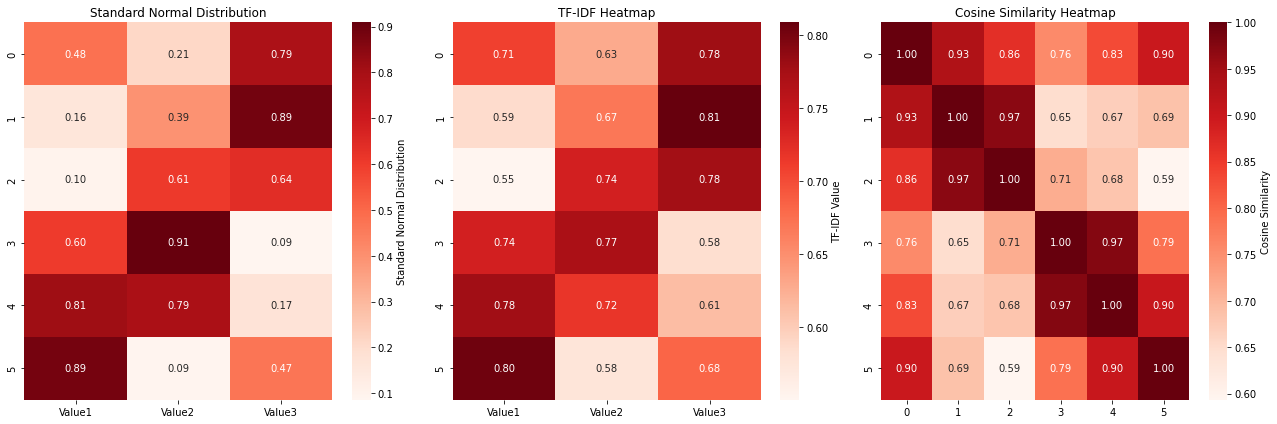

社員番号 101 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 2.54
社員番号 102 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 1.20
社員番号 103 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 2.19
社員番号 104 のデータはクラスタ 1 に属しています。クラスタの中心点からの距離: 2.92
社員番号 105 のデータはクラスタ 1 に属しています。クラスタの中心点からの距離: 1.11
社員番号 106 のデータはクラスタ 1 に属しています。クラスタの中心点からの距離: 3.68


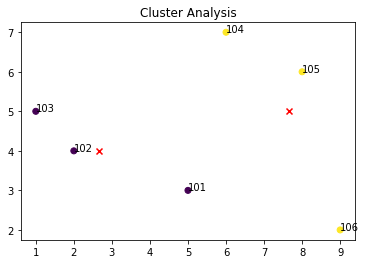

社員番号 101 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 3.72
社員番号 102 のデータはクラスタ 1 に属しています。クラスタの中心点からの距離: 1.22
社員番号 103 のデータはクラスタ 1 に属しています。クラスタの中心点からの距離: 1.22
社員番号 104 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 3.51
社員番号 105 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 2.19
社員番号 106 のデータはクラスタ 0 に属しています。クラスタの中心点からの距離: 3.29


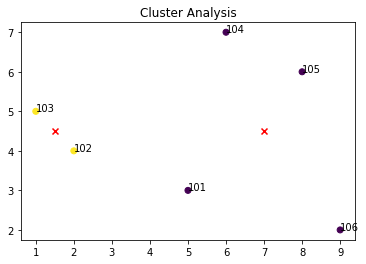

In [33]:
if __name__ == "__main__":
    main()